In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("nifty_50_stock_data.csv")
df

,Symbol,Open,High,Low,LTP,Chng,Volume (lacs),52w H,52w L,Close
0,ADANIPORTS,750.00,766.00,713.25,715.00,-47.45,72.20,901.00,384.40,742.00
1,ASIANPAINT,3101.00,3167.35,3091.00,3138.00,-6.25,10.29,3505.00,2117.15,3152.00
2,AXISBANK,669.00,674.90,660.45,661.00,-18.90,102.53,866.90,568.40,669.00
3,BAJAJ-AUTO,3370.00,3383.50,3320.00,3335.00,-56.70,3.42,4361.40,3041.00,3371.00
4,BAJAJFINSV,17200.00,17237.20,16610.00,16684.00,-684.85,3.42,19325.00,8273.70,16726.00
5,BAJFINANCE,7021.00,7047.90,6775.00,6780.00,-345.80,16.89,8050.00,4362.00,4769.00
6,BHARTIARTL,763.00,763.00,733.10,735.85,-29.30,111.43,781.80,454.11,753.85
7,BPCL,397.15,397.20,375.00,377.40,-22.70,100.23,503.00,357.00,387.40
8,BRITANNIA,3560.00,3635.10,3533.95,3566.60,-6.80,3.73,4153.00,3317.30,3578.60
9,CIPLA,892.00,976.05,890.65,965.00,65.05,144.59,1005.00,726.50,986.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Symbol         50 non-null     object 
 1   Open           50 non-null     float64
 2   High           50 non-null     float64
 3   Low            50 non-null     float64
 4   LTP            50 non-null     float64
 5   Chng           50 non-null     float64
 6   Volume (lacs)  50 non-null     float64
 7   52w H          50 non-null     float64
 8   52w L          50 non-null     float64
 9   Close          50 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.0+ KB


In [4]:
df.isnull().sum() # No null values

Symbol           0
Open             0
High             0
Low              0
LTP              0
Chng             0
Volume (lacs)    0
52w H            0
52w L            0
Close            0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
# pip install pandas-profiling
from pandas_profiling import ProfileReport
prof  = ProfileReport(df)
prof.to_file(output_file = "pandas_profiling_report_stock_report.html")


KeyboardInterrupt



In [7]:
df.columns

Index(['Symbol', 'Open', 'High', 'Low', 'LTP', 'Chng', 'Volume (lacs)',
       '52w H', '52w L', 'Close'],
      dtype='object')

In [8]:
df['Open'] = df["Open"] = [float(str(i).replace(",", "")) for i in df["Open"]]
df['High'] = df["High"] = [float(str(i).replace(",", "")) for i in df["High"]]
df['Low'] = df["Low"] = [float(str(i).replace(",", "")) for i in df["Low"]]
df['LTP'] = df["LTP"] = [float(str(i).replace(",", "")) for i in df["LTP"]]
df['Chng'] = df["Chng"] = [float(str(i).replace(",", "")) for i in df["Chng"]]
df['Volume (lacs)'] = df["Volume (lacs)"] = [float(str(i).replace(",", "")) for i in df["Volume (lacs)"]]
df['52w H'] = df["52w H"] = [float(str(i).replace(",", "")) for i in df["52w H"]]
df['52w L'] = df["52w L"] = [float(str(i).replace(",", "")) for i in df["52w L"]]
df['Close'] = df["Close"] = [float(str(i).replace(",", "")) for i in df["Close"]]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Symbol         50 non-null     object 
 1   Open           50 non-null     float64
 2   High           50 non-null     float64
 3   Low            50 non-null     float64
 4   LTP            50 non-null     float64
 5   Chng           50 non-null     float64
 6   Volume (lacs)  50 non-null     float64
 7   52w H          50 non-null     float64
 8   52w L          50 non-null     float64
 9   Close          50 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.0+ KB


In [10]:
# df['Symbol'].replace({
#  'ADANIPORTS': 1,
#  'ASIANPAINT': 2,
#  'AXISBANK': 3,
#  'BAJAJ-AUTO': 4,
#  'BAJAJFINSV': 5,
#  'BAJFINANCE': 6,
#  'BHARTIARTL': 7,
#  'BPCL': 8,
#  'BRITANNIA': 9,
#  'CIPLA': 10,
#  'COALINDIA': 11,
#  'DIVISLAB': 12,
#  'DRREDDY': 13,
#  'EICHERMOT': 14,
#  'GRASIM': 15,
#  'HCLTECH': 16,
#  'HDFC': 17,
#  'HDFCBANK': 18,
#  'HDFCLIFE': 19,
#  'HEROMOTOCO': 20,
#  'HINDALCO': 21,
#  'HINDUNILVR': 22,
#  'ICICIBANK': 23,
#  'INDUSINDBK': 24,
#  'INFY': 25,
#  'IOC': 26,
#  'ITC': 27,
#  'JSWSTEEL': 28,
#  'KOTAKBANK': 29,
#  'LT': 30,
#  'M&M': 31,
#  'MARUTI': 32,
#  'NESTLEIND': 33,
#  'NTPC': 34,
#  'ONGC': 35,
#  'POWERGRID': 36,
#  'RELIANCE': 37,
#  'SBILIFE': 38,
#  'SBIN': 39,
#  'SHREECEM': 40,
#  'SUNPHARMA': 41,
#  'TATACONSUM': 42,
#  'TATAMOTORS': 43,
#  'TATASTEEL': 44,
#  'TCS': 45,
#  'TECHM': 46,
#  'TITAN': 47,
#  'ULTRACEMCO': 48,
#  'UPL': 49,
#  'WIPRO': 50
#  },inplace=True)


label_encode = LabelEncoder()
label_encode.fit(df['Symbol'])
symbol_encode = label_encode.fit_transform(df['Symbol'])
df['Symbol'] = symbol_encode

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Symbol         50 non-null     int64  
 1   Open           50 non-null     float64
 2   High           50 non-null     float64
 3   Low            50 non-null     float64
 4   LTP            50 non-null     float64
 5   Chng           50 non-null     float64
 6   Volume (lacs)  50 non-null     float64
 7   52w H          50 non-null     float64
 8   52w L          50 non-null     float64
 9   Close          50 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 4.0 KB


In [12]:
df.describe()

,Symbol,Open,High,Low,LTP,Chng,Volume (lacs),52w H,52w L,Close
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,24.50000,2985.739000,3017.261000,2914.208000,2939.569000,-70.133000,71.266600,3440.588000,2208.556800,2918.16900
std,14.57738,5024.412163,5057.739037,4911.417131,4943.921262,163.203678,93.462062,5813.045344,3962.991087,4919.93409
min,0.00000,125.600000,125.600000,120.500000,121.150000,-770.500000,0.300000,141.500000,77.050000,140.65000
25%,12.25000,673.000000,678.425000,662.112500,663.187500,-66.775000,13.472500,777.825000,391.837500,672.93750
50%,24.50000,1155.950000,1156.750000,1105.750000,1121.250000,-29.975000,30.750000,1456.125000,819.775000,1142.25000
75%,36.75000,2760.262500,2789.425000,2668.537500,2690.450000,-7.812500,99.200000,3388.000000,2272.600000,2693.95000
max,49.00000,26450.000000,26539.900000,25812.000000,25900.000000,158.400000,517.880000,32048.000000,22531.000000,25900.00000


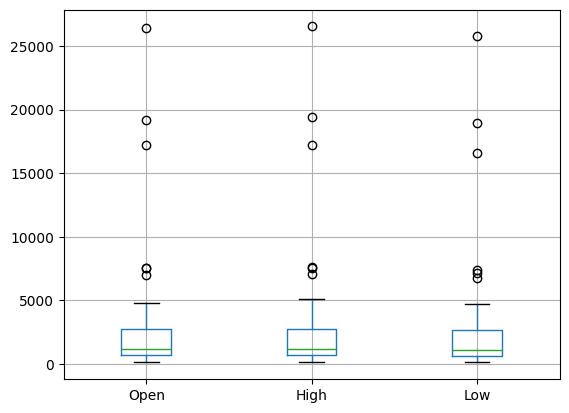

In [13]:
df[['Open','High','Low']].boxplot()
plt.show()

In [14]:
Q3 = np.quantile(df['Open'], 0.75)
Q1 = np.quantile(df['Open'], 0.25)
print("Q1 :",Q1)
print("Q3 :",Q3)
IQR = Q3 - Q1
print("IQR :",IQR)

open_upper_tail = Q3 + 1.5*IQR
open_lower_tail = Q1 - 1.5*IQR
print("Upper Tail :", open_upper_tail)
# print("Lower Tail :", open_lower_tail)

Q1 : 673.0
Q3 : 2760.2625
IQR : 2087.2625
Upper Tail : 5891.15625


In [15]:
df.loc[(df['Open'] > open_upper_tail) | (df['Open'] < open_lower_tail)]  ##This are my outliers in 'Open' Column

,Symbol,Open,High,Low,LTP,Chng,Volume (lacs),52w H,52w L,Close
4,4,17200.00,17237.2,16610.0,16684.00,-684.85,3.42,19325.00,8273.7,16726.00
5,5,7021.00,7047.9,6775.0,6780.00,-345.80,16.89,8050.00,4362.0,4769.00
31,31,7520.00,7520.0,7130.0,7150.00,-422.50,11.55,8368.00,6400.0,7151.00
32,32,19148.85,19434.1,18982.5,19250.00,71.95,0.56,20609.15,16002.1,19290.00
39,39,26450.00,26539.9,25812.0,25900.00,-770.50,0.30,32048.00,22531.0,25900.00
47,47,7550.00,7599.0,7370.1,7398.45,-210.35,2.66,8269.00,4770.0,7400.45


In [16]:
index = df.loc[(df['Open'] > open_upper_tail) | (df['Open'] < open_lower_tail)].index
index

Index([4, 5, 31, 32, 39, 47], dtype='int64')

In [17]:
# Z-Score Method to detect outliers
from scipy.stats import zscore
# # For Single Column
# def get_outliers(array):
#     z_score_values = zscore(array)
#     index_list = np.where(np.abs(z_score_values) > 1.5)
#     print(index_list)
#     outliers = array[index_list]
#     print("outliers :", outliers)
#     return outliers
# chng_arr = df['Chng'].to_numpy()
# chng_outliers = get_outliers(chng_arr)
# chng_outliers

# For All Columns
# df_col_list[1:] ==> To skip First Column i.e Symbol
def get_outliers_values(df_col_list):
    for feature_name in df_col_list[1:]:
        z_score = zscore(df[feature_name])
        index_list = np.where(np.abs(z_score) > 1.5)
        outliers = df[feature_name].loc[index_list]
        print(feature_name,"outliers:- \n",outliers,"\n")   
    
get_outliers_values(df.columns)   


Open outliers:- 
 4     17200.00
32    19148.85
39    26450.00
Name: Open, dtype: float64 

High outliers:- 
 4     17237.2
32    19434.1
39    26539.9
Name: High, dtype: float64 

Low outliers:- 
 4     16610.0
32    18982.5
39    25812.0
Name: Low, dtype: float64 

LTP outliers:- 
 4     16684.0
32    19250.0
39    25900.0
Name: LTP, dtype: float64 

Chng outliers:- 
 4    -684.85
5    -345.80
31   -422.50
39   -770.50
Name: Chng, dtype: float64 

Volume (lacs) outliers:- 
 26    270.27
34    231.36
38    263.06
42    517.88
Name: Volume (lacs), dtype: float64 

52w H outliers:- 
 4     19325.00
32    20609.15
39    32048.00
Name: 52w H, dtype: float64 

52w L outliers:- 
 4      8273.7
32    16002.1
39    22531.0
Name: 52w L, dtype: float64 

Close outliers:- 
 4     16726.0
32    19290.0
39    25900.0
Name: Close, dtype: float64 



[5.42828672 6.32903846 5.35224689 6.37940722 7.31561907 6.81273009
 5.43967368 4.99836776 6.41247446 5.5426246  4.34299441 6.58698172
 6.5629276  6.19615004 5.9781187  5.69086278 6.27128201 5.87807511
 5.36801607 6.21674145 5.07160424 6.15766266 5.41848664 5.58454842
 5.95819568 4.17535673 4.61176787 5.35149791 6.0597676  6.00014033
 5.53745606 6.85226382 7.37400583 4.21879686 4.31704733 4.52945992
 6.18940308 5.71018376 5.13708825 7.54738828 5.4500033  5.47115332
 5.136738   5.71236125 6.38917897 5.89641863 6.16650202 6.85455111
 5.40670301 5.31419161]


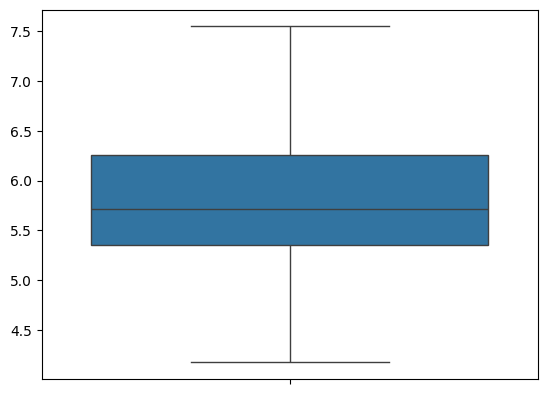

0       750.00
1      3101.00
2       669.00
3      3370.00
4     17200.00
5      7021.00
6       763.00
7       397.15
8      3560.00
9       892.00
10      157.75
11     4770.00
12     4580.00
13     2495.00
14     1757.30
15     1120.00
16     2820.35
17     1500.00
18      685.00
19     2580.00
20      441.80
21     2344.00
22      739.00
23      951.00
24     1702.55
25      125.60
26      228.90
27      668.25
28     2002.00
29     1820.00
30      885.00
31     7520.00
32    19148.85
33      133.20
34      152.25
35      204.05
36     2467.80
37     1154.00
38      486.25
39    26450.00
40      775.00
41      800.20
42      486.00
43     1157.90
44     3425.00
45     1544.00
46     2377.80
47     7550.00
48      726.00
49      632.00
Name: Open, dtype: float64


In [18]:

# # Useing boxcox handled outliers of Column 'Open'
from scipy.stats import boxcox
open_array = boxcox(df['Open'])[0]
print(open_array)
sns.boxplot(open_array)
plt.show()
print(df['Open'])

In [19]:
df.loc[(df['Open'] > open_upper_tail) | (df['Open'] < open_lower_tail)]

,Symbol,Open,High,Low,LTP,Chng,Volume (lacs),52w H,52w L,Close
4,4,17200.00,17237.2,16610.0,16684.00,-684.85,3.42,19325.00,8273.7,16726.00
5,5,7021.00,7047.9,6775.0,6780.00,-345.80,16.89,8050.00,4362.0,4769.00
31,31,7520.00,7520.0,7130.0,7150.00,-422.50,11.55,8368.00,6400.0,7151.00
32,32,19148.85,19434.1,18982.5,19250.00,71.95,0.56,20609.15,16002.1,19290.00
39,39,26450.00,26539.9,25812.0,25900.00,-770.50,0.30,32048.00,22531.0,25900.00
47,47,7550.00,7599.0,7370.1,7398.45,-210.35,2.66,8269.00,4770.0,7400.45


In [20]:

print(df['Open'].mean())
print(df['Open'].median())
print(open_upper_tail)
print(open_lower_tail)

2985.739
1155.95
5891.15625
-2457.8937499999997


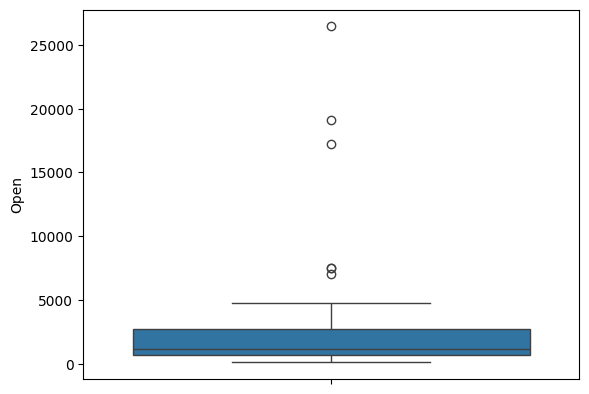

In [21]:
sns.boxplot(df['Open'])
plt.show()

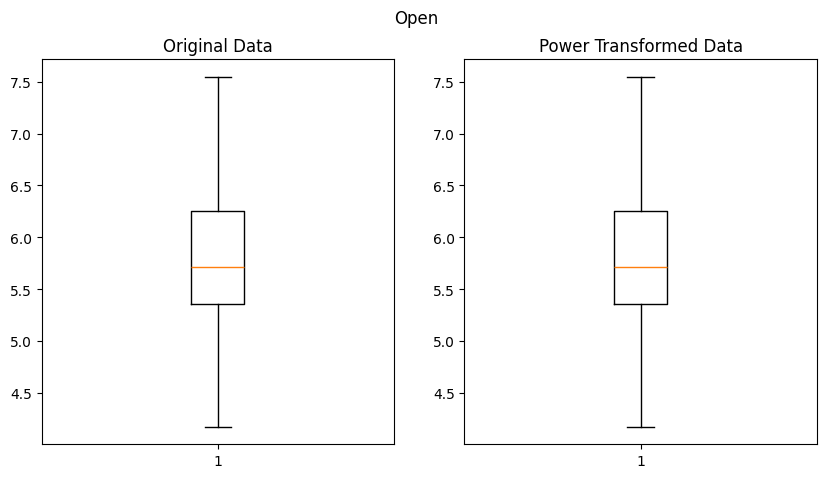

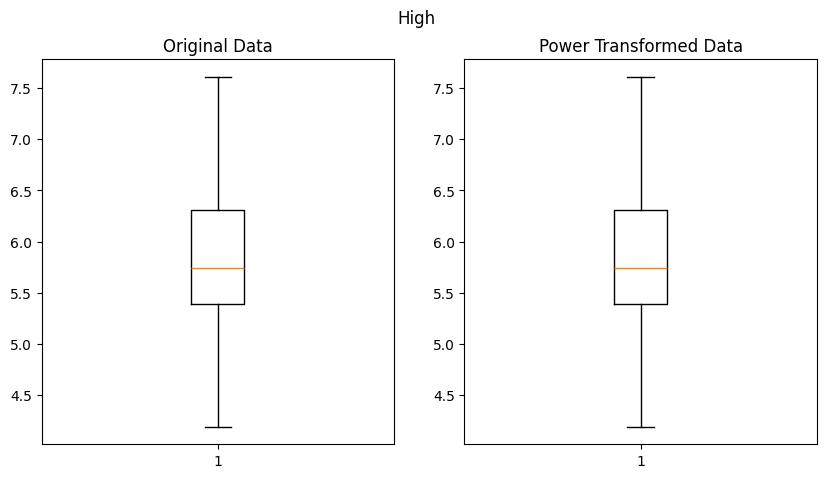

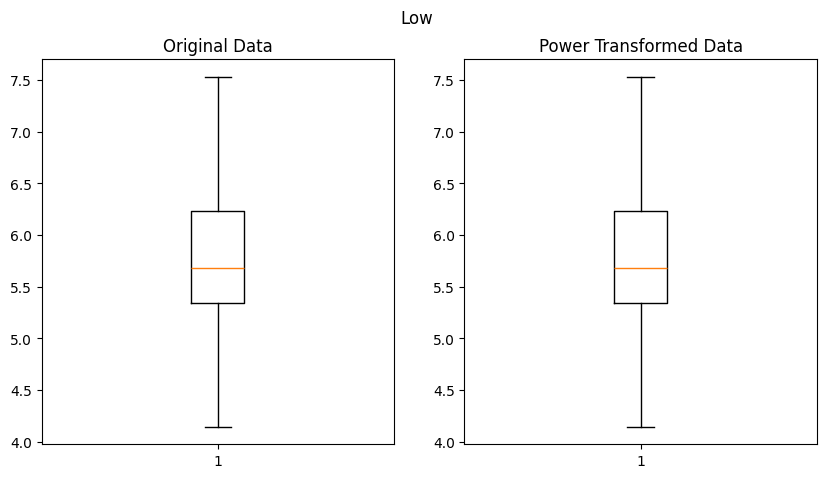

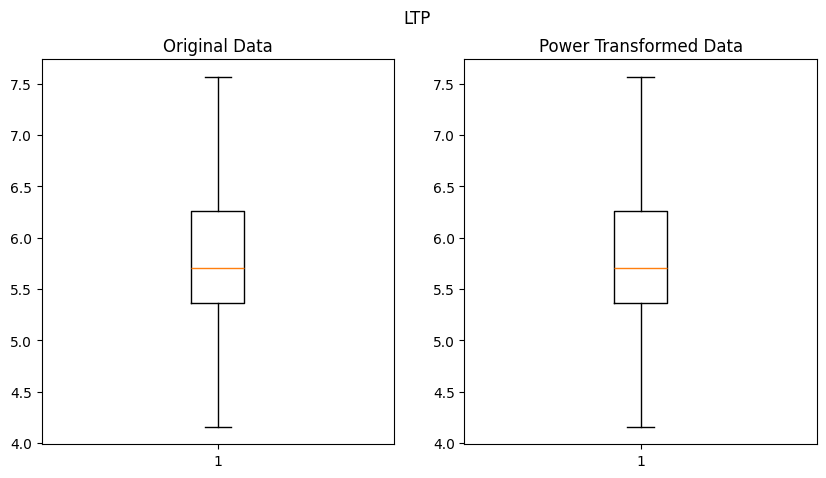

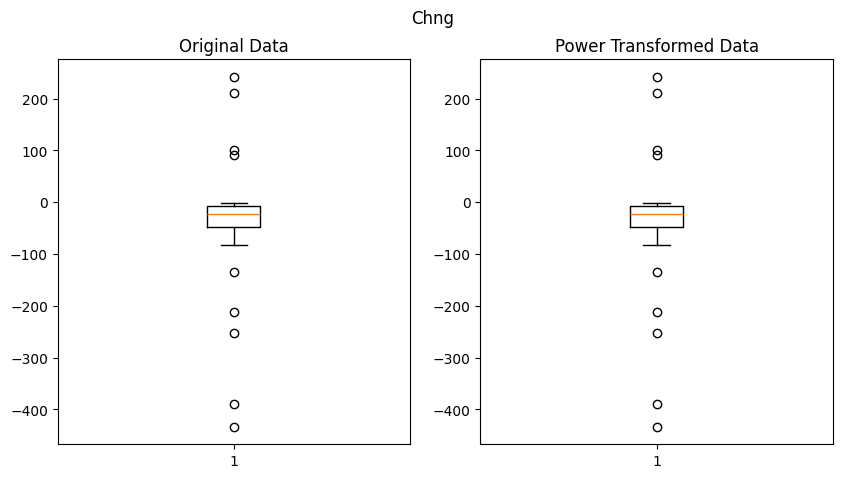

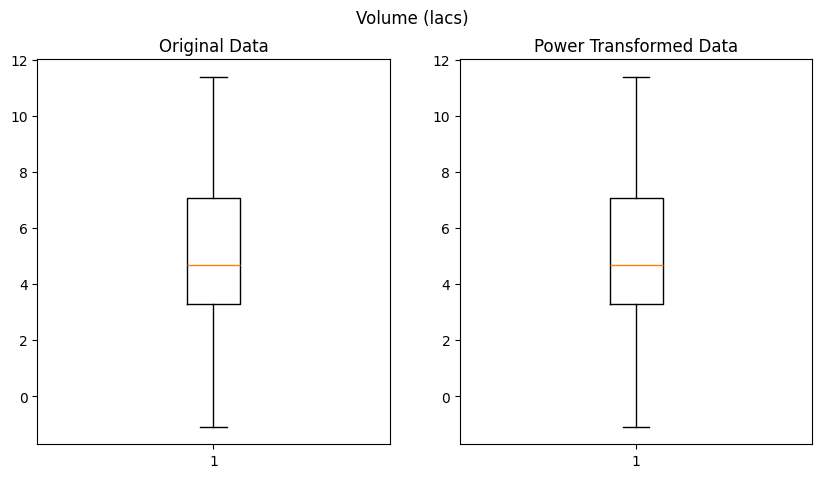

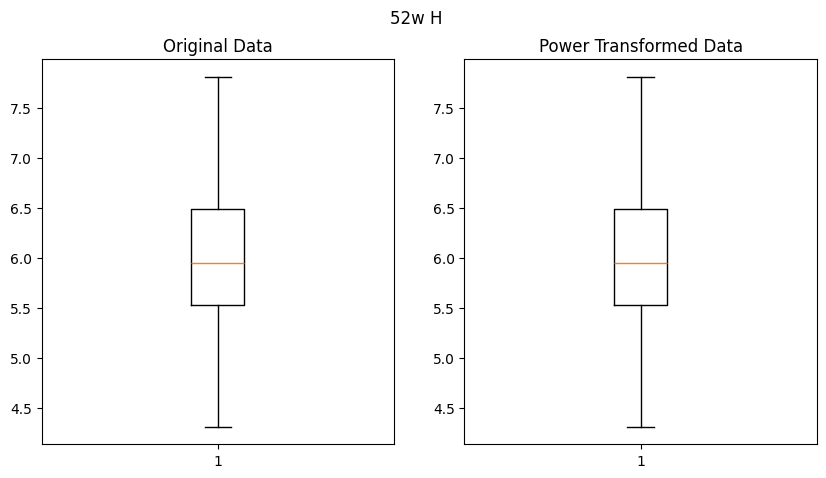

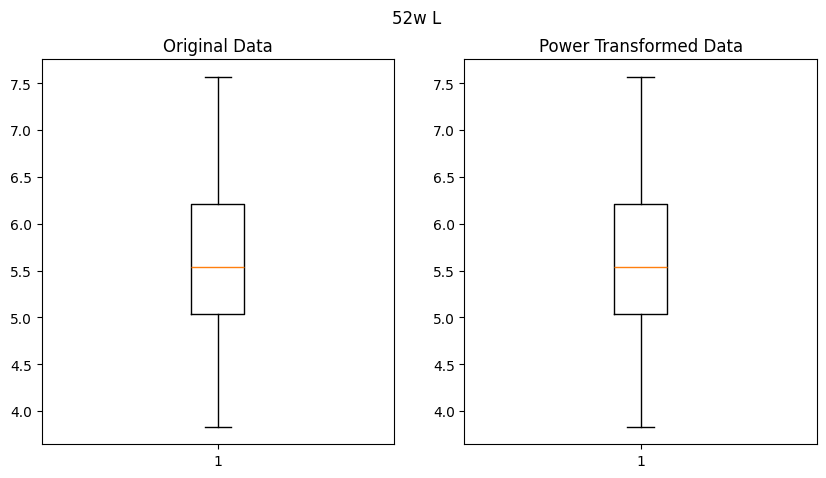

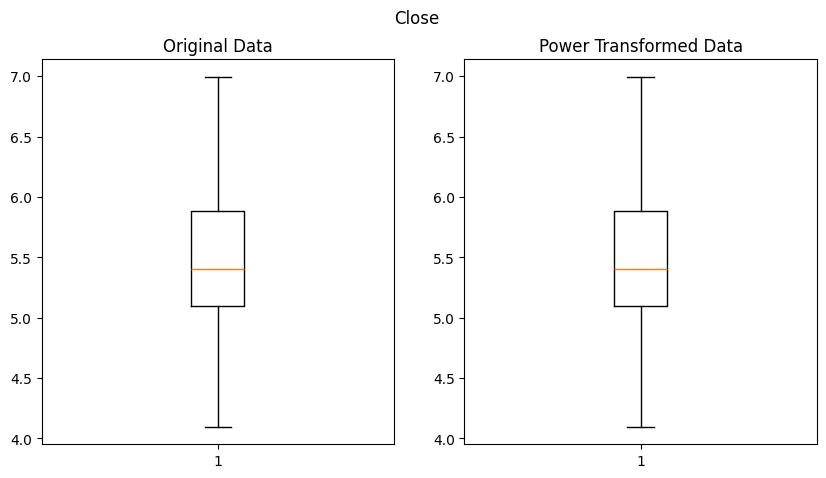

In [22]:
from scipy.stats import boxcox, yeojohnson

lambda_dict = {}
for col in df.iloc[:, 1:]:
    try:
        transformed_data, lambda_value = boxcox(df[col])
    except:
        transformed_data, lambda_value = yeojohnson(df[col])
    df[col] = transformed_data
    lambda_dict[col] = float(lambda_value)
    # Visualize the results
    plt.figure(figsize=(10, 5))

    # Original data
    plt.subplot(1, 2, 1)
    plt.boxplot(df[col])
    plt.suptitle(col)
    plt.title('Original Data')

    # Transformed data
    plt.subplot(1, 2, 2)
    plt.boxplot(transformed_data)
    plt.title('Power Transformed Data')
    plt.show()

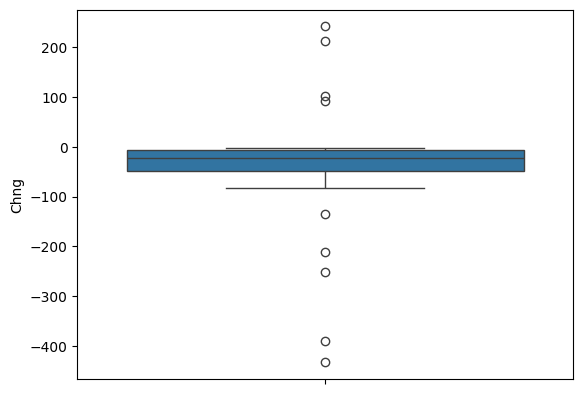

In [23]:
sns.boxplot(df['Chng'])
plt.show()

In [24]:
Q3 = np.quantile(df['Chng'], 0.75)
Q1 = np.quantile(df['Chng'], 0.25)
IQR = Q3 - Q1

upper_tail = Q3 + 1.5*IQR
lower_tail = Q1 - 1.5*IQR
print(df['Chng'].mean())
print(df['Chng'].median())
print("Upper Tail :", upper_tail)
print("Lower Tail :", lower_tail)

-37.70828769684753
-23.1559640000035
Upper Tail : 54.98491538752768
Lower Tail : -109.61704973120999


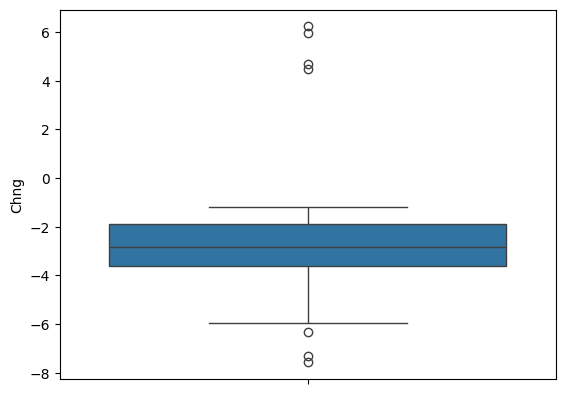

In [25]:
df['Chng'] = np.cbrt(df['Chng'])
sns.boxplot(df['Chng'])
plt.show()

In [26]:
#IQR
df['Chng'] = np.where(
           (df['Chng'] < lower_tail) | (df['Chng'] > upper_tail),
           df['Chng'].mean(),  # Replace outliers with mean value
           df['Chng']
       )

In [27]:
df.loc[(df['Chng'] < lower_tail) | (df['Chng'] > upper_tail)]

,Symbol,Open,High,Low,LTP,Chng,Volume (lacs),52w H,52w L,Close


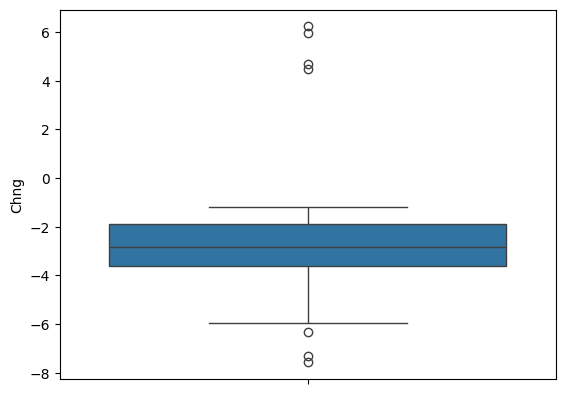

In [28]:
sns.boxplot(df['Chng'])
plt.show()

In [49]:
#Train Test Split
x = df.drop('Close', axis=1)
y = df['Close']
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)
x_train.columns

Index(['Symbol', 'Open', 'High', 'Low', 'LTP', 'Chng', 'Volume (lacs)',
       '52w H', '52w L'],
      dtype='object')

In [50]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [51]:
def model_eval(model, ind_var, act):
    
    pred = model.predict(ind_var)
    mse = mean_squared_error(act, pred)
    rmse = np.sqrt(mse)
    mae= mean_absolute_error(act , pred)
    r2_val = r2_score(act,pred)
    
    return {"mse": mse, "rmse": rmse, "mae": mae, "r2_val": r2_val}

print("Testing Data Evaluation: \n", model_eval(model, x_test, y_test))
print("Training Data Evaluation: \n", model_eval(model, x_train, y_train),'\n')

Testing Data Evaluation: 
 {'mse': np.float64(0.0004407033635449682), 'rmse': np.float64(0.0209929360391768), 'mae': np.float64(0.015252801878383071), 'r2_val': 0.9983966516733637}
Training Data Evaluation: 
 {'mse': np.float64(0.0009500182276639569), 'rmse': np.float64(0.030822365705181633), 'mae': np.float64(0.0199129833124539), 'r2_val': 0.9979701274584629} 



In [52]:

df.iloc[2]

Symbol           2.000000
Open             5.352247
High             5.386952
Low              5.342052
LTP              5.358961
Chng            -2.477257
Volume (lacs)    7.152406
52w H            5.602976
52w L            5.292633
Close            5.091248
Name: 2, dtype: float64

In [53]:
# 'Symbol', 'Open', 'High', 'Low', 'LTP', 'Chng', 'Volume (lacs)','52w H', '52w L'
model.predict([[49,310,400,300.320,2,5623,500,300]])

ValueError: X has 8 features, but LinearRegression is expecting 9 features as input.

In [34]:
with open('LinearReg_Model.pkl','wb') as f:
    pickle.dump(model,f)

In [35]:
original_data = label_encode.inverse_transform(symbol_encode)
symbol_inverse = dict(zip(original_data, symbol_encode.tolist()))

In [36]:
column_data = {
    'columns': list(x.columns),
    'lambda' : lambda_dict,
    'symbols': symbol_inverse
    }
column_data

{'columns': ['Symbol',
  'Open',
  'High',
  'Low',
  'LTP',
  'Chng',
  'Volume (lacs)',
  '52w H',
  '52w L'],
 'lambda': {'Open': -0.062087588803004405,
  'High': -0.06032235636393223,
  'Low': -0.062186673219025816,
  'LTP': -0.06117822217532796,
  'Chng': 1.1025653239955637,
  'Volume (lacs)': 0.1759567706066347,
  '52w H': -0.05758159322487576,
  '52w L': -0.05890705889474543,
  'Close': -0.0787218665146726},
 'symbols': {'ADANIPORTS': 0,
  'ASIANPAINT': 1,
  'AXISBANK': 2,
  'BAJAJ-AUTO': 3,
  'BAJAJFINSV': 4,
  'BAJFINANCE': 5,
  'BHARTIARTL': 6,
  'BPCL': 7,
  'BRITANNIA': 8,
  'CIPLA': 9,
  'COALINDIA': 10,
  'DIVISLAB': 11,
  'DRREDDY': 12,
  'EICHERMOT': 13,
  'GRASIM': 14,
  'HCLTECH': 15,
  'HDFC': 16,
  'HDFCBANK': 17,
  'HDFCLIFE': 18,
  'HEROMOTOCO': 19,
  'HINDALCO': 20,
  'HINDUNILVR': 21,
  'ICICIBANK': 22,
  'INDUSINDBK': 23,
  'INFY': 24,
  'IOC': 25,
  'ITC': 26,
  'JSWSTEEL': 27,
  'KOTAKBANK': 28,
  'LT': 29,
  'M&M': 30,
  'MARUTI': 31,
  'NESTLEIND': 32,
  'N

In [37]:
with open('column_data.json','w') as f:
    json.dump(column_data,f)